TF-IDF & LinearSVC Results:
              precision    recall  f1-score   support

           1       0.50      0.33      0.40        15
           2       0.45      0.62      0.52        21
           3       0.43      0.47      0.45        19
           4       0.00      0.00      0.00         5

    accuracy                           0.45        60
   macro avg       0.34      0.36      0.34        60
weighted avg       0.42      0.45      0.42        60

Accuracy: 0.45
Majority Vote Baseline Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.35      1.00      0.52        21
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         5

    accuracy                           0.35        60
   macro avg       0.09      0.25      0.13        60
weighted avg       0.12      0.35      0.18        60

Accuracy: 0.35


/home/itay.nakash/miniconda3/envs/hw_gpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/itay.nakash/miniconda3/envs/hw_gpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/itay.nakash/miniconda3/envs/hw_gpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

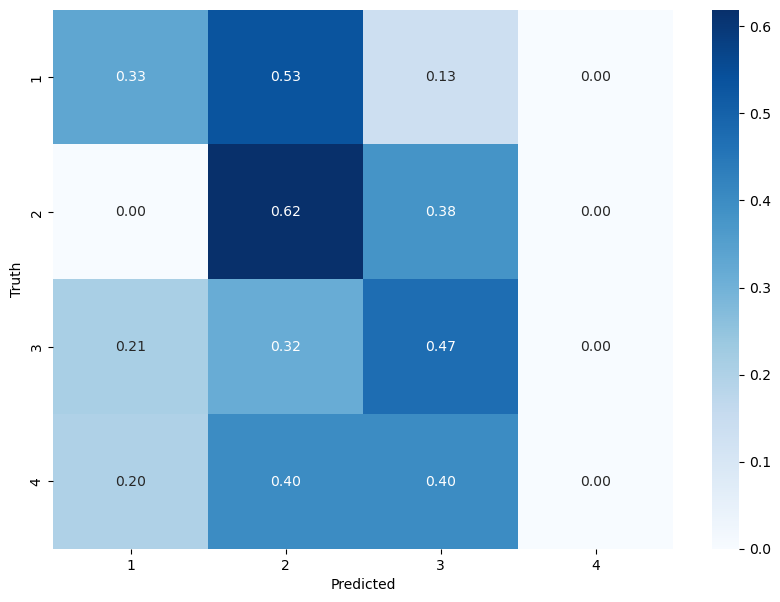

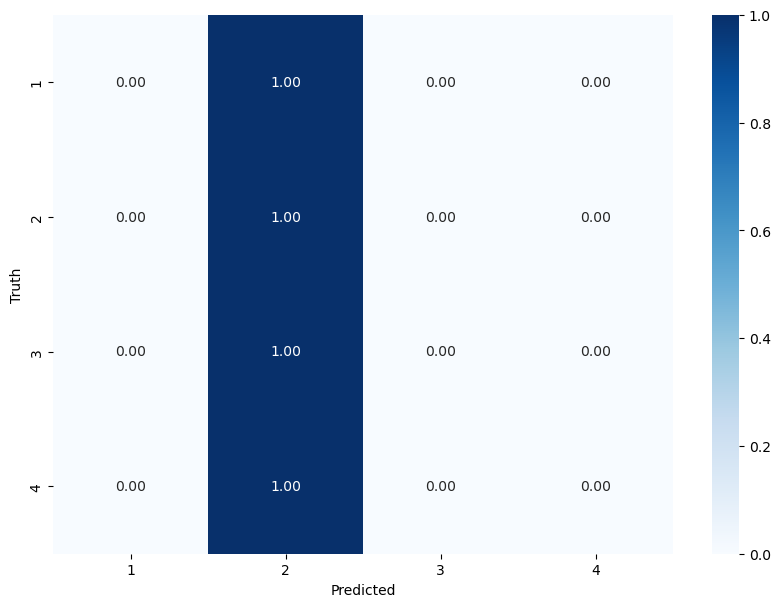

Top features for class 1:
kid, windows, dumped, asked, guy, fuck, dog, man, mum, hair
Top features for class 2:
sick, tried, smoking, walked, closet, well, after, shit, farted, he
Top features for class 3:
best, wrinkle, her, almost, visited, spent, louise, text, in, friend
Top features for class 4:
exams, blame, nudist, colony, knob, jumped, doubt, am, cancer, jackass


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter

data_folder= '/home/itay.nakash/hw/roy_corse/TIDU/data/'

class TextClassifier:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.clf = LinearSVC()

    def load_data(self):
        train_data = pd.read_csv(data_folder + 'train.csv')
        val_data = pd.read_csv(data_folder + 'val.csv')
        full_train_data = pd.concat([train_data, val_data])

        self.X_train = full_train_data['text']
        self.y_train = full_train_data['label']
        test_data= pd.read_csv(data_folder+'test.csv')
        self.X_test = test_data['text']
        self.y_test = test_data['label']

    def transform_data(self):
        self.X_train_vec = self.vectorizer.fit_transform(self.X_train)
        self.X_test_vec = self.vectorizer.transform(self.X_test)

    def train(self):
        self.clf.fit(self.X_train_vec, self.y_train)

    def predict(self):
        return self.clf.predict(self.X_test_vec)

    def majority_vote_baseline(self):
        most_common_class = Counter(self.y_train).most_common(1)[0][0]
        return [most_common_class] * len(self.y_test)


def print_report(y_test, y_pred, method):
    print(f'{method} Results:')
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))


def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Truth')
    plt.show()


def print_top_features(vectorizer, clf, class_labels, n=10):
    feature_names = vectorizer.get_feature_names_out()
    for i, class_label in enumerate(class_labels):
        top_features = np.argsort(clf.coef_[i])[-n:]
        print(f"Top features for class {class_label}:")
        print(", ".join(feature_names[j] for j in top_features))


def plot_wordclouds(X_train, y_train, vectorizer, class_labels):
    for class_label in class_labels:
        class_words = ' '.join(X_train[y_train == class_label])
        class_word_vector = vectorizer.transform([class_words])
        words_freq = dict(zip(vectorizer.get_feature_names_out(), np.asarray(class_word_vector.sum(axis=0)).ravel()))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Most frequent words in class {class_label}")
        plt.show()


if __name__ == '__main__':
    classifier = TextClassifier()

    # Load and transform data
    classifier.load_data()
    classifier.transform_data()

    # Train classifier and get predictions
    classifier.train()
    y_pred = classifier.predict()

    # Get baseline predictions
    baseline_pred = classifier.majority_vote_baseline()

    # Print reports
    print_report(classifier.y_test, y_pred, 'TF-IDF & LinearSVC')
    print_report(classifier.y_test, baseline_pred, 'Majority Vote Baseline')

    # Plot confusion matrices
    plot_confusion_matrix(classifier.y_test, y_pred, labels=[1, 2, 3, 4])
    plot_confusion_matrix(classifier.y_test, baseline_pred, labels=[1, 2, 3, 4])

    # Print top features for each class
    print_top_features(classifier.vectorizer, classifier.clf, class_labels=[1, 2, 3, 4])

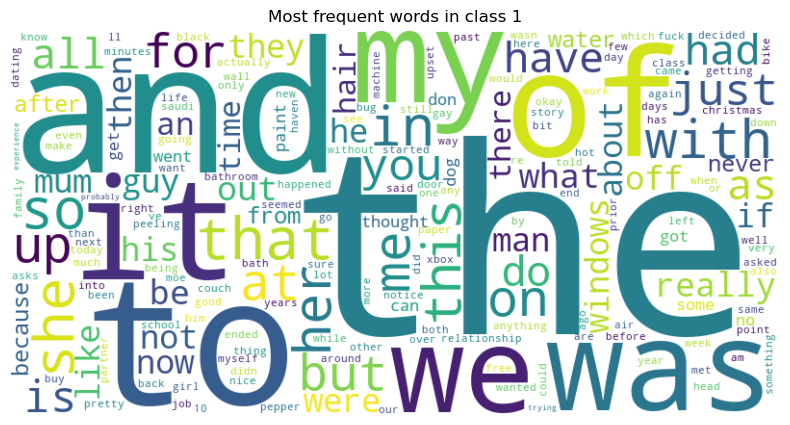

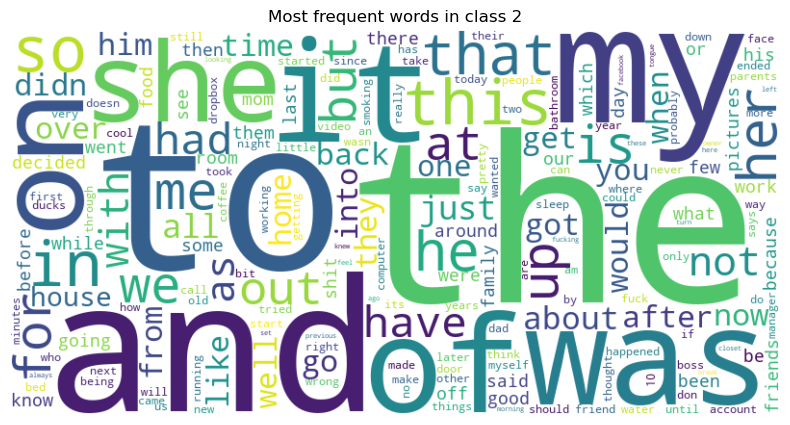

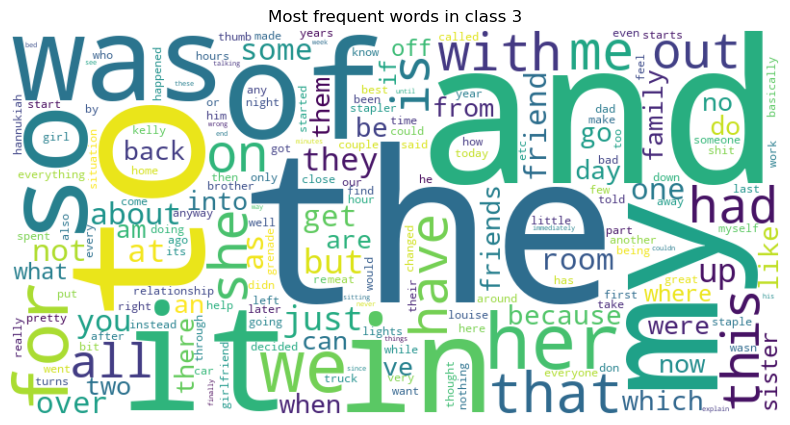

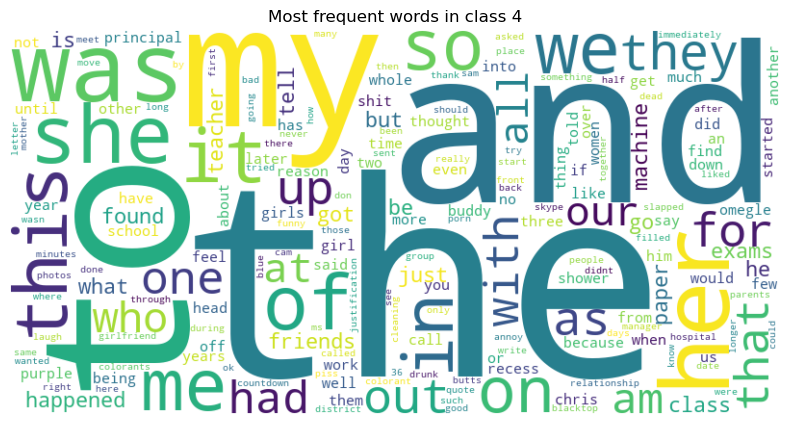

In [2]:
    # Plot word clouds for each class
    plot_wordclouds(classifier.X_train, classifier.y_train, classifier.vectorizer, class_labels=[1, 2, 3, 4])

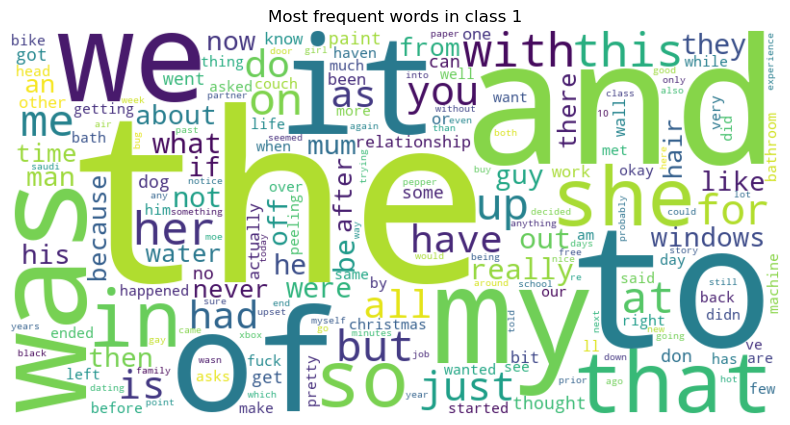

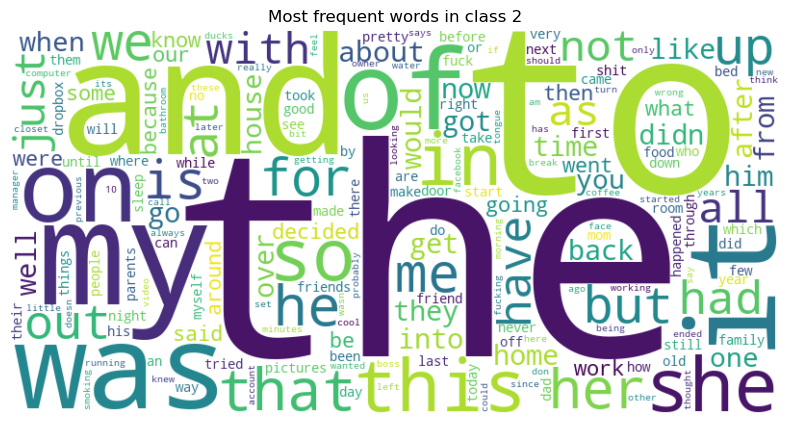

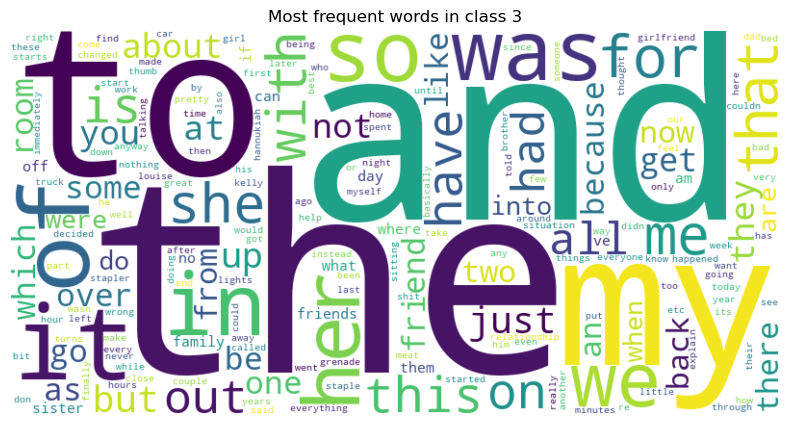

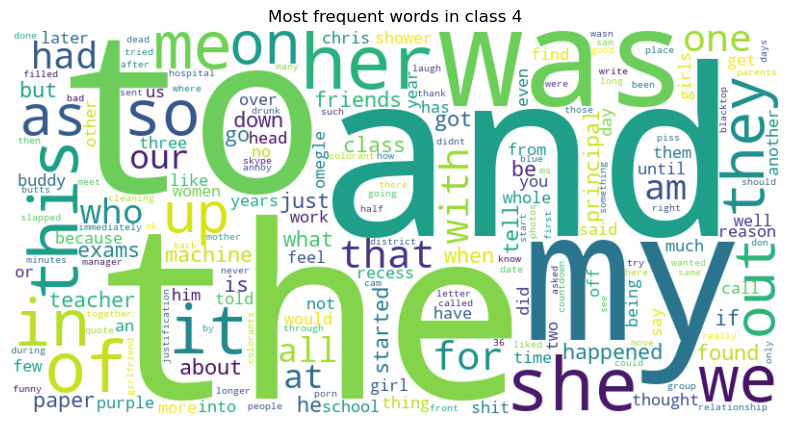

In [3]:
    # Plot word clouds for each class
    plot_wordclouds(classifier.X_train, classifier.y_train, classifier.vectorizer, class_labels=[1, 2, 3, 4])

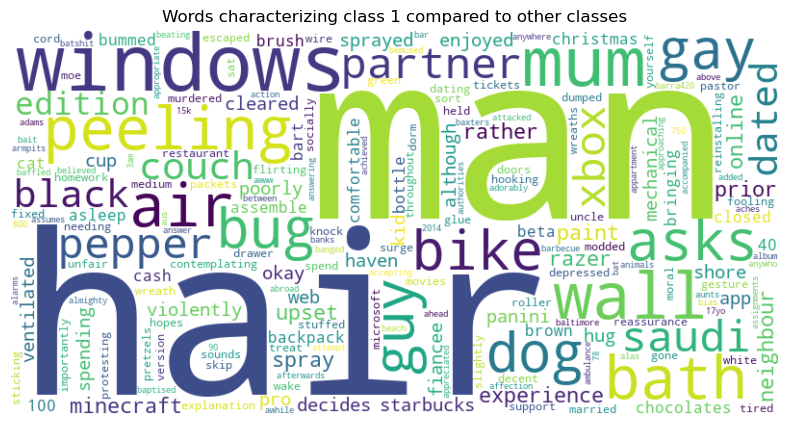

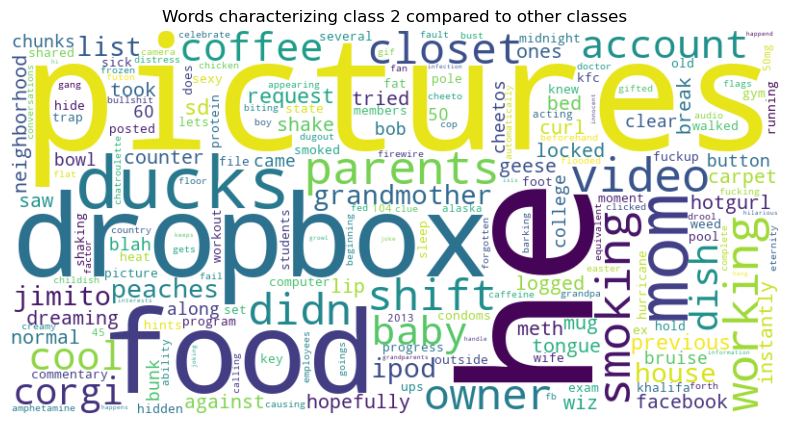

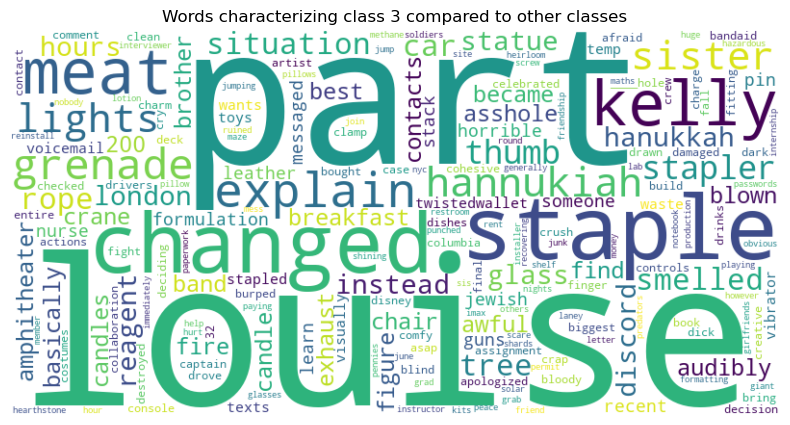

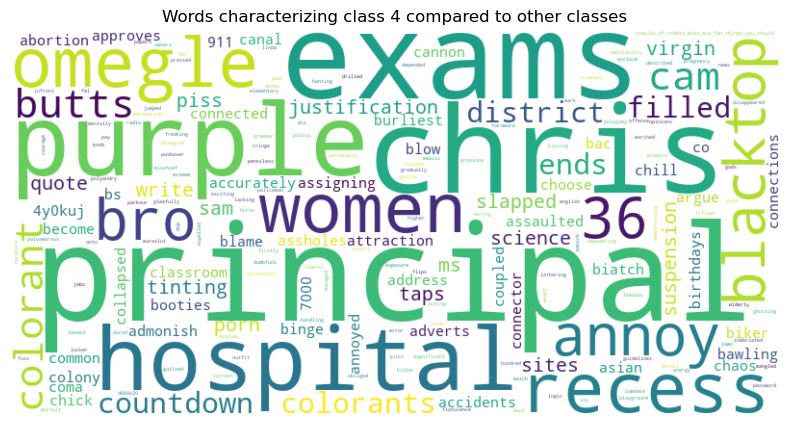

In [4]:
from sklearn.feature_extraction.text import CountVectorizer


""""
1. Create a term frequency (TF) matrix for each class.
2. Subtract the TF matrices of the other classes from the TF matrix of the class of interest.
3. Keep only the positive values in the resulting matrix. This will give you a measure of how much more each word is used in the class of interest compared to the other classes.
4. Use these measures as word frequencies to create a word cloud.
"""
def plot_difference_wordclouds(X_train, y_train, vectorizer, class_labels):
    count_vectorizer = CountVectorizer(vocabulary=vectorizer.get_feature_names_out())
    
    for class_label in class_labels:
        # Compute term frequency matrix for the class of interest
        class_words = ' '.join(X_train[y_train == class_label])
        tf_class = np.asarray(count_vectorizer.transform([class_words]).sum(axis=0)).ravel()
        
        # Compute term frequency matrix for the other classes
        other_class_words = ' '.join(X_train[y_train != class_label])
        tf_other = np.asarray(count_vectorizer.transform([other_class_words]).sum(axis=0)).ravel()
        
        # Compute the difference
        tf_difference = tf_class - tf_other
        
        # Keep only positive values
        tf_difference = np.maximum(tf_difference, 0)
        
        # Create a dictionary of word frequencies
        words_freq = dict(zip(vectorizer.get_feature_names_out(), tf_difference))
        
        # Remove words with a frequency of zero
        words_freq = {word: freq for word, freq in words_freq.items() if freq > 0}
        
        # Create and plot the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Words characterizing class {class_label} compared to other classes")
        plt.show()

# Use this function in your main code:
if __name__ == '__main__':
    ...
    plot_difference_wordclouds(classifier.X_train, classifier.y_train, classifier.vectorizer, class_labels=[1, 2, 3, 4])
